## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析，最终分享给你的好友 :P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 登陆微信，并通过向文件传输助手发送打招呼信息**

**任务1 - 统计你的微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

---

## 任务0. 登陆并发送打招呼信息

### 登陆
在这一个章节中，我们已经为你导入`itchat`这个包，并调用`login()`函数登陆网页微信，试试看运行以下代码，并扫描二维码以登陆网页微信。

In [199]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
import itchat
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


In [200]:
# 调用login()函数以登录网页微信
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 读书林


---
**注意：如果您的账号为2018年新注册的账号，或者您倾向于使用假数据来完成此项目，可以将下方代码块中的变量`use_fake_dataset`设置为`True`。并且，您无需完成任务0中的练习和问题，可以直接从任务1开始。**

In [201]:
### 以下内容无需改动，直接运行即可
# 读取数据
use_fake_dataset = True
#print(itchat.get_friends(update=True)[0:])
if  use_fake_dataset:
    dataset = itchat.get_friends(update=True)[0:]
else:
    dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')


---

### 练习：打个招呼吧

在这个章节中，我们将调用`itchat`的`send()`函数向文件传输助手`filehelper`发送一个打招呼信息吧！

你需要完成以下内容：
 - 将想要发送的信息内容赋值给`message`

In [202]:
### TODO：将信息内容赋值给message
message = None
message = '你好 filehelper'

In [203]:
### 以下内容无需改动，直接运行即可
# 发送消息
itchat.send(message, 'filehelper')

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '6962077251023045253', 'LocalID': '15328788851474'}>

打开手机微信端的文件传输助手，看看是否收到了这条信息，并回答以下问题。

### **问题1**
message 的变量类型是什么？

**回答**：（字符串str  微信Text文本类型）

In [138]:
### 退出登陆
itchat.logout()

LOG OUT!


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

---

## 任务1. 好友男女比例

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [141]:
### 以下内容无需改动，直接运行即可
def preprocess_data(dataset):
    
    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} 
            for item in dataset]
    
    return data

pre_data = preprocess_data(dataset)

### 练习：打印数据
* 打印`pre_data`的数据类型
* 打印`pre_data`中的第一条数据，以及其数据类型。
* 打印`pre_data`中第一条数据的微信昵称

In [187]:
### TODO：打印pre_data的数据类型
print(type(pre_data))
#print(dataset)

<class 'list'>


In [188]:
### TODO：打印第一条数据及数据类型
print(pre_data[0],type(pre_data[0]))

{'NickName': '读书林', 'Sex': 1, 'Province': '广东', 'City': '广州', 'Signature': ''} <class 'dict'>


In [190]:
### TODO：打印第一条数据的微信昵称
print(pre_data[0]['NickName'])


读书林


### **问题2**
pre_data的数据类型是什么？pre_data中第一条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

回答：（list  dict, list是可变的查找和插入的时间随着元素的增加而增加，查找和插入的速度极快，不会随着key的增加而变慢）

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。

提示：
- `pre_data`中1表示男性、2表示女性；
- *注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [212]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}
for i in pre_data[1:]:
    if(i['Sex'] == 1):
        sex['male']+=1
    elif(i['Sex'] == 2):
        sex['female']+=1
    else:
        sex['unknown']+=1

In [213]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 244 位男性、 135 位女性，有 48 位好友未填写。


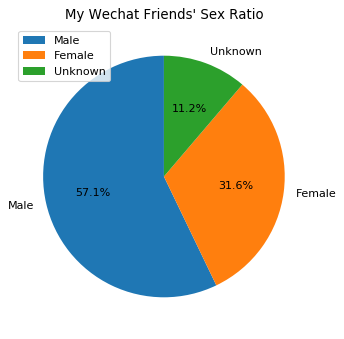

In [214]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**

提示：可以用`for`循环实现

*注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [215]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []
for p in range(len(pre_data)):
    province.append(pre_data[p]['Province'])

In [216]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

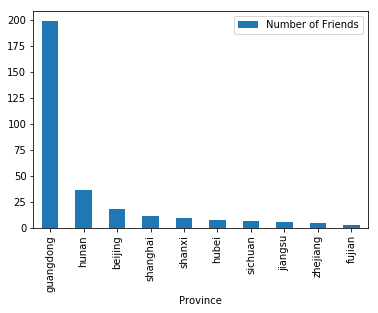

LOG OUT!


In [217]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出最长的3个个性签名

In [182]:
### TODO：打印最长的3个个性签名
#print(pre_data)
lens = []
sigs = []
for i in pre_data:
    lens.append(len(i['Signature']))
    sigs.append(i['Signature'])
for s in sorted(lens)[-3:]:
    print('index:{0} len:{1}'.format(lens.index(s),s))
    print(sigs[lens.index(s)])
    


index:353 len:106
∞<span class="emoji emoji1f47c"></span>You and me &amp; We are one<span class="emoji emoji1f47c"></span> ∞
index:252 len:109
常青松，驻顶峰，齐心协力兴素风！
<span class="emoji emoji1f64f"></span> 松峰素食<span class="emoji emoji2764"></span> 15088088058
index:299 len:138
Tomorrow is another day!<span class="emoji emoji1f60a"></span><span class="emoji emoji1f60a"></span><span class="emoji emoji1f60a"></span>


In [183]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
sList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
        sList.append({'nick':i['NickName'],'Signature':i['Signature']})
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

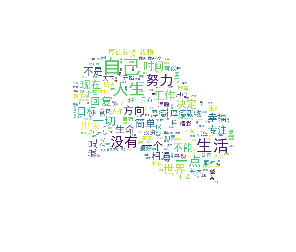

In [197]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

In [144]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

提示：可以用循环语句或者列表表达式实现。

In [184]:
### 以下内容无需修改，直接运行即可
sentiments = []

for i in sList:
    if(SnowNLP(i['Signature']).sentiments < 0.33):
        print(i['nick']+ ' ' +i['Signature'] +' 消极')

for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

般若 如果要用时间证明爱，那多浪费时间！ 消极
狸窝 198元升级永久会员。 消极
祥子 缺钱中 消极
八爪-运维帮 此微信已满，请加yunweibang555 消极
甄别 人可以缺钱，但不能缺德。善恶苍天自有分别。 消极
传说中世界上最美的女人 各位小主，小的上班时间九点到六点，请在上班时间找小的 消极
mj 一根网线 消极
KC_凯西世嘉 正常使用，看到会尽快回复的 消极
壹伍陆汽车服务～岳阳店8312878 壹伍陆～岳阳店主营-贴膜，美容，装饰，改装，原厂件升级，保养 消极
小芳 能圆融一切'容纳一切'才是真正的修心！ 消极
thinker Stay Hungry，Stay Foolish.Pay attention to whole wo r l d 消极
盘古大叔 二手程序员 消极
c2聪 好事多磨，贵在坚持 消极
zhang 做对的事，找对的人。 消极
颜小东 此人极度不安分 | 熊猫签证&amp;上上签 消极
伍湖四海皆美丽 久久不见久久见，久久见过还想见 消极
编程界的小学生 什么都要会一点，这样装起逼来不会尴尬。<span class="emoji emoji1f613"></span> 消极
kyna 愛笑的女孩子運氣不會太差…… 消极
小竹子 先给自己定个小目标，比如瘦个20斤～ 消极
丢丢 滴答滴答 消极
立木斤 立木斤 消极
小宝👉 丝域vip客服 现金红包，天猫礼券，产品优惠。工作时间:周一至周五9-18点 消极
Rugani stay hungry stay foolish 消极
Jenbo 宁静致远 消极
孙茂林 随便 消极
静安💕 诚信 消极
Del 非淡泊无以明志，非宁静无以致远！ 消极
Neo I always pay my debts 消极
风森林 今天很残酷'明天更残酷'后天很美好 消极
Angela life is a journey，to find your dream！ 消极
邓海平 敢想，敢拼，敢赢 消极
铭子 Tomorrow is another day!<span class="emoji emoji1f60a"></span><span class="emoji emoji1f60a"></span><span class="emoji emoji1f60a"></span> 消极
聂小康 见自己  见天地 

In [185]:
### TODO：统计sentiments中大于0.66的个数
positive = 0

### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = 0

### TODO：统计sentiments中小于0.33的个数
negative = 0

for i in range(len(sentiments)):
    if(sentiments[i] > 0.66):
        positive += 1
    elif(sentiments[i] >= 0.33 and sentiments[i] <= 0.66):
        neutral += 1
    elif(sentiments[i] < 0.33):
        negative +=1

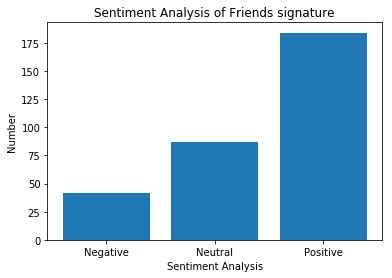

In [198]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**